# 03. 회귀 알고리즘과 모델 규제

<aside>

🐠 **농어의 무게를 측정하라!**

</aside>

# 03-1. k-최근접 이웃 회귀

### 지도학습의 종류

- 분류: 샘플을 몇 개의 클래스 중 하나로 분류하는 문제
- 회귀: 샘플을 클래스 중 하나로 분류하는 것이 아닌, **임의의 어떤 숫자를 예측하는 문제**
    - 예를 들어 내년의 경제 성장률을 예측하는 문제, 농어의 무게를 예측하는 문제 등
    - 정해진 클래스가 없고, 임의의 수치를 출력함

### k-최근접 이웃 회귀

- k-최근접 이웃 분류 알고리즘과 비슷하게, 수치를 예측하려는 샘플 X 로부터 가장 인접한 k개의 샘플을 선택하고, 이 샘플들의 타깃(여기서는 클래스가 아닌 임의의 수치임)값의 평균을 구해 그것을 X의 타깃값으로 예측함.
- 쉽게 설명하면, 근처 가까운 k개 샘플 뽑고, 이 샘플들의 타깃값(수치)의 평균을 구함.
- 예를 들어 이웃한 샘플들의 타깃값이 각각 100, 80, 60이면, 예측 타깃값은 80이 된다.

### 데이터 준비

농어의 길이만을 가지고 무게를 예측하려고 함. 그럼 이때, 길이가 특성이고, 무게가 타깃이 됨.

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

특성 데이터 length를 x축에 두고, 타깃 데이터 weight를 y축에 둔 채로 산점도를 그려봄.

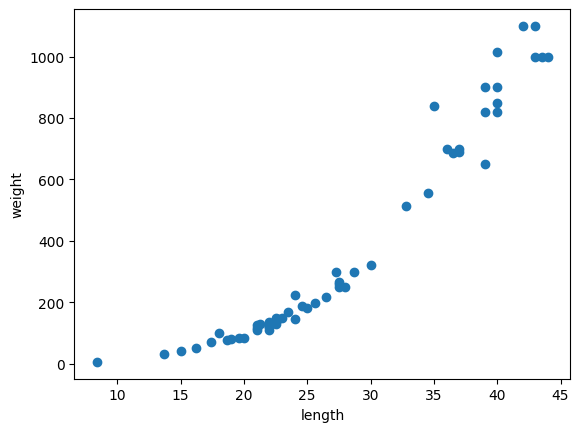

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight) # y축이 target data
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

머신러닝 모델에 사용하기 전에 이전과 같이 사이킷런의 train_test_split 메소드를 사용하여 훈련 세트와 테스트 세트로 나눔.

perch_length가 input data, perch_weight가 target data로 들어가게 됨.

In [7]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


사이킷런에서 사용할 훈련 세트는 반드시 2차원 배열이어야 함. 따라서 reshape 메소드를 이용하여 1차원 → 2차원 배열로 바꿔줌.

In [10]:
train_input = train_input.reshape(42, -1)
test_input = test_input.reshape(14, -1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수

- KNeighborsRegressor 클래스를 import하여 k-최근접 이웃 회귀 알고리즘을 사용할 수 있음.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


- 분류에서 score은 테스트 세트의 샘플을 정확하게 분류한 개수의 비율을 뜻했음. 회귀의 경우, **임의의 수치인 타깃값을 예측으로 정확하게 맞추는 것이 매우 어렵기 때문에,** 다른 방법으로 score 값을 평가함.
- 바로 **결정계수**(coefficient of determination)을 점수로 사용함. 일반적으로  R²로 표기.
    - 모델이 그냥 모든 타깃값을 평균으로 찍는 것보다 얼마나 더 잘하는지를 평가

In [ ]:
print(knr.score(test_input, test_target))

- 타깃과 예측한 값 사이의 차이를 구하려면 사이킷런의 mean_absolute_error 클래스를 import 하면 된다.
- 타깃값과 예측값 사이의 절댓값 오차를 평균하여 반환함.

In [15]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input) # 테스트 세트에 대한 예측을 만듬
print(test_prediction)

mae = mean_absolute_error(test_prediction, test_target) # 정답과 비교
print(mae)

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
19.157142857142862


### 과대적합 vs 과소적합

- 과대적합은 훈련 세트에서 점수가 굉장히 좋았는데, 테스트 세트에서 점수가 굉장히 나쁘게 나오는 모델임. 즉, 훈련 세트에만 잘 맞는 모델임.
- 과소적합은 훈련 세트보다 테스트 세트에서 점수가 더 높거나, 두 점수가 모두 너무 낮은 모델임. 모델이 너무 단순하여 적절히 훈련되지 않은 경우 발생함.
    - 훈련 세트와 테스트 세트의 크기가 너무 작기 때문에 발생함. 제대로 일반화를 하지 못하는 경우.

아래는 훈련 세트보다 테스트 세트가 score가 더 높음. 보통 상식적으로 생각했을 때, 훈련 세트가 더 score가 높아야 할 것임 → 과소적합 발생한 모델

In [18]:
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.992809406101064
0.9698823289099254


- 과소적합 문제를 해결하려면 모델을 더 복잡하게 만들어야 함. 이는 이웃한 **k의 개수를 줄이는 방식**으로 달성할 수 있음.
    - k의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따르게 되고, 반대로 줄이게 되면 훈련 세트에 있는 국지적인 패턴에 민감해지기 때문임.

아래의 경우 5 → 3개로 인접한 샘플의 수를 줄임. 결과는 훈련 세트가 테스트 세트보다 더 나은 score을 기록하므로, 과소적합 문제를 해결함.

In [20]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) # 훈련 세트 결정계수 측정
print(knr.score(test_input, test_target)) # 테스트 세트 결정계수 측정

0.9804899950518966
0.9746459963987609


# 03-2. 선형 회귀

### 50cm 농어의 무게를 k-최근접 이웃 회귀로 예측하기

50cm 농어의 무게를 예측해 보자. 1033.3 g 정도가 나간다고 모델이 예측하였다. 하지만 실제 농어는 이보다 더 무겁다.

In [21]:
print(knr.predict([[50]]))

[1033.33333333]


그 원인은 샘플에서 인접한 3개의 샘플을 뽑아 산점도에 표시했을 때 쉽게 알 수 있다. 그냥 3개의 샘플의 평균 length 값을 반영해 예측 타깃값을 출력한 것이다.

즉, 새로운 샘플이 **훈련 세트의 범위를 벗어나게 되면 엉뚱한 값을 예측**할 수도 있다.

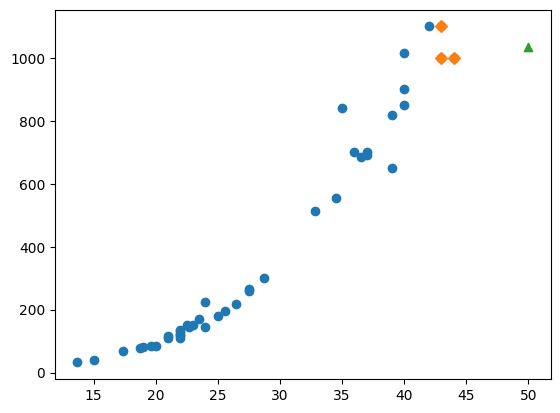

In [27]:
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.show()

### 선형 회귀

- 가장 널리 사용되는 대표적인 회귀 알고리즘
- 특성이 하나인 경우, 직선을 학습함. 즉**, feature를 가장 잘 나타낼 수 있는 직선을 자동으로 찾는 머신러닝 알고리즘.**
- LinearRegression 클래스를 import 하여 사용함

fit을 사용하여 모델을 학습시키면, 모델은 자동으로 feature를 가장 잘 표현하는 직선을 하나 찾아낸다. 아래는 그 직선을 찾고 predict한 모습임.

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target) # 선형 회귀 모델 훈련 -> 가장 적합한 직선 찾아냄
print(lr.predict([[50]]))

[1241.83860323]


직선은 y = ax + b와 같은 형태로 표현된다. 여기서 a가 coef_, b가 intercept_를 의미한다. x는 length, y는 weight.

In [30]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


<aside>

💡 coef_와 intercept_는 머신러닝 알고리즘이 찾은 값이라는 뜻에서 **모델 파라미터(model parameter)**라 부름.

많은 머신러닝 알고리즘은 훈련을 할 때 **최적의 model parameter를 찾는 것**을 목표로 함.

이를 **모델 기반 학습**이라 함.

이와 반대로 k-최근접 이웃 알고리즘처럼 훈련 세트를 저장하고 그렇게 저장한 것 자체를 훈련으로 는 것을 사례 기반 학습이라 함.

</aside>

선형 회귀 모델이 찾아낸 최적의 직선을 산점도에 그려보면 아래와 같음. 예측한 타깃값은 직선이 통과함

→ 이렇게 하면 훈련 세트의 범위를 벗어난 샘플도 타깃값을 예측할 수 있게 됨.

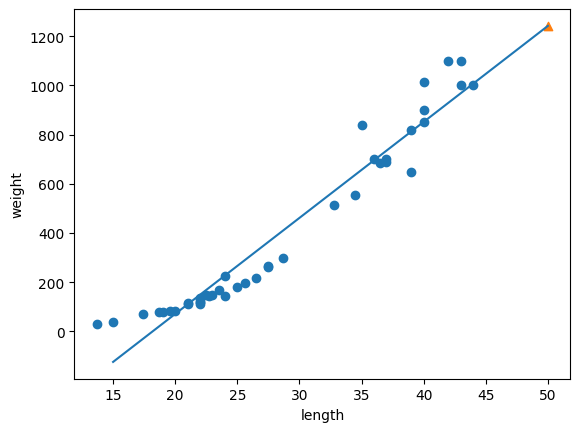

In [33]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) # 15에서 50까지 1차 방정식 그래프 그림
plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그런데, 보면 알겠지만 두 경우 결정 계수가 다 너무 안 좋음. 따라서 전체적으로 과소적합 돼 있다고 볼 수 있음. 그리고 위의 산점도에서 직선을 보면 알겠지만, weight가 음수인 샘플도 존재함 ⇒ 무게가 마이너스인 농어가 있다?

In [34]:
print(lr.score(train_input, train_target)) # 훈련 세트의 결정계수 출력
print(lr.score(test_input, test_target)) # 테스트 세트의 결정계수도 출력

0.939846333997604
0.8247503123313558


### 다항 회귀

- 다항 회귀는 다항식을 사용한 선형 회귀의 한 종류임.
- 선형 회귀에서 선형은 input과 target 사이의 관계가 아닌, **가중치(coef)와 target 사이의 관계를 의미함.**

농어의 길이와 무게에 대한 산점도는 자세히 보면 일직선이 아닌 곡선에 가까움. 따라서 feature를 가장 잘 나타낼 수 있는 곡선을 찾아야 함 → **즉, 2차 방정식의 계수와 절편을 구해야 함.**

column_stack 메소드를 사용하여 train_input을 제곱한 feature를 기존 feature 앞에 추가한다. 그리고 바로 fit으로 모델 훈련을 시킨다. 모델은 y = ax^2+bx+c에서 feature를 가장 잘 표현하는, **가장 적합한 a, b, c을 찾음**

In [37]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


아래는 모델 훈련으로 찾은 계수와 절편임.

In [38]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


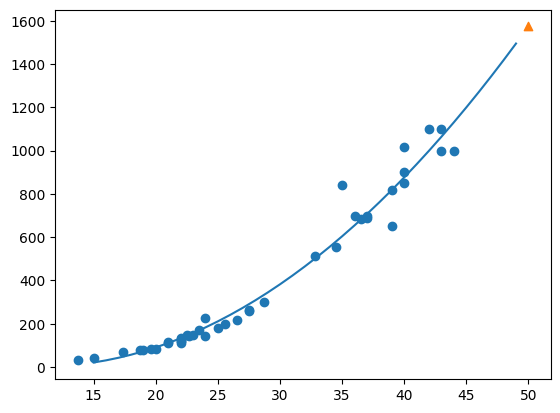

In [44]:
point = np.arange(15, 50) # 구간별 직선 그리기 위해 15~49 정수 배열 만듬
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2+lr.coef_[1]*point+lr.intercept_)
plt.scatter(50, lr.coef_[0]*50**2+lr.coef_[1]*50+lr.intercept_, marker='^')
plt.show()

그런데, 결정계수를 print하면 훈련 세트의 값보다 테스트 세트의 값이 더 큰 것을 확인할 수 있다 → 과소적합 문제 발생

In [49]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
